# Linear Regression

## Iris dataset  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
# iris

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X_all = iris.data
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
X_all.shape

(150, 4)

In [ ]:
X = X_all[:, 0]
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

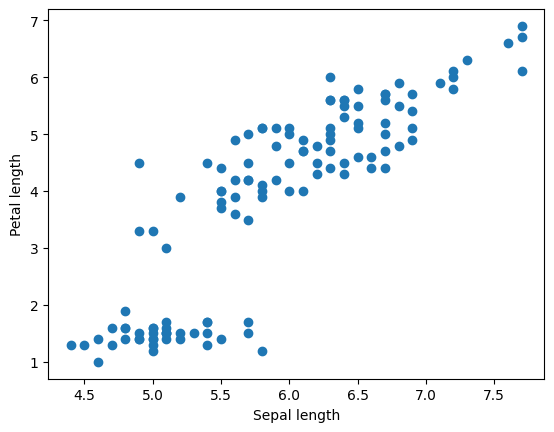

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

In [ ]:
x = np.array([1,2,3])
x.shape, x.reshape(-1,1).shape

((3,), (3, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Train Score : {:.3f}".format(linr.score(X_train.reshape(-1,1), y_train)))
print("Test Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))

Train Score : 0.770
Test Score : 0.712


In [ ]:
print(linr.coef_, linr.intercept_)

[1.89858443] -7.3177193400113545


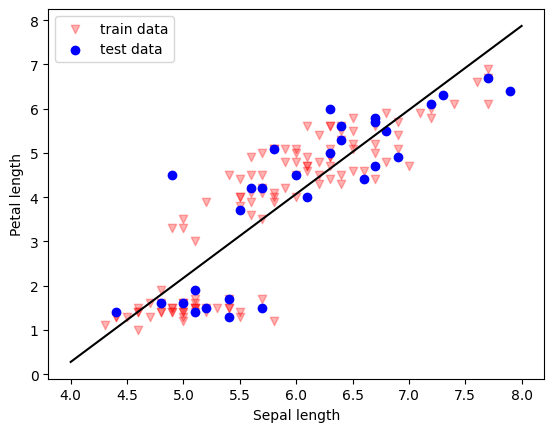

In [ ]:
plt.scatter(X_train, y_train, marker='v', c='r', alpha=0.3)
plt.scatter(X_test, y_test, marker='o', c='b')
plt.legend(['train data', 'test data'])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

xx = np.linspace(4, 8, 3)
plt.plot(xx, linr.coef_ * xx + linr.intercept_, "k-")

- let's try to predict the petal width using the other 3 features

In [ ]:
# adjusted R2
def adj_R2 (X, y, R2):
    n = len(y)      # no of samples
    p = X.shape[1]  # no of features
    return (1 - (1-R2)*(n-1)/(n-p-1))

X, y = X_all[:, 0:3], X_all[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linr = LinearRegression()
linr.fit(X_train, y_train)
print(linr.score(X_test, y_test), adj_R2(X_test, y_test, linr.score(X_test, y_test)))
linr.coef_, linr.intercept_

0.9091406222718262 0.8986568479185755


(array([-0.15240111,  0.17052645,  0.4906919 ]), -0.28745864956318545)

## KFold() Cross Validation
- it was developed mainly for classification tasks, and its default scorer is accuracy.
- (**misconception**:) not recommended for regressions.
- K-Fold cross-validation is equally important and useful for both classification and regression tasks.
- when used for regressions, use it with KFold() as cv parameter
  - classification 에서는 cross_val_score(cv=5) 이지만
  - regression 에서는 cv=KFold(5), cross_val_score(cv=v)
  - why?
    - for classification, scikit-learn uses StratifiedKFold by default
    - For regression tasks, stratification is typically not necessary because the target variable is continuous rather than categorical. Therefore, using KFold without stratification is generally sufficient.

In [ ]:
from sklearn.linear_model import SGDRegressor, SGDClassifier
X_all = iris.data
X = X_all[:,0]
y = X_all[:,2]

cv = KFold(n_splits=5, shuffle=True)  # Returns the number of splitting iterations in the cross-validator.
lr = SGDRegressor()
score = cross_val_score(lr, X.reshape(-1,1), y, cv=cv)

print(score.round(2))
print(score.mean().round(2))

[0.41 0.47 0.35 0.4  0.31]
0.39


In [ ]:
X_all, y = iris.data , iris.target

cv = KFold(n_splits=5, shuffle=True)
clf = SGDClassifier()
score = cross_val_score(clf, X_all, y, cv=5)

print(score.round(2))
print(score.mean().round(2))

[0.77 0.5  0.87 0.87 0.83]
0.77


In [ ]:
## what is cv?
print(cv)
print(cv.get_n_splits(X))

KFold(n_splits=5, random_state=None, shuffle=True)
5


In [ ]:
for train_index, test_index in cv.split(X):
    print("TRAIN:\n", train_index,'\n', "TEST:\n", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN:
 [  0   1   2   4   5   6   7   8   9  10  12  13  16  17  18  19  20  22
  23  24  27  28  29  30  31  32  33  36  38  39  40  42  43  45  46  47
  49  50  51  52  53  54  55  56  58  59  61  62  63  64  65  66  67  68
  70  71  72  74  75  76  77  79  80  81  83  84  86  88  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110 111 113
 114 115 116 117 118 119 120 121 122 124 125 126 128 129 131 132 133 134
 135 136 138 139 140 141 142 144 145 146 148 149] 
 TEST:
 [  3  11  14  15  21  25  26  34  35  37  41  44  48  57  60  69  73  78
  82  85  87  89 109 112 123 127 130 137 143 147]
TRAIN:
 [  0   1   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19
  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  43  44  45  47  48  50  51  52  53  54  55  57  60  61  62  63
  66  68  69  71  72  73  74  75  76  77  78  81  82  84  85  86  87  89
  91  92  93  94  95  96  97  99 100 102 104 106 107 108 109 110 112 113

In [ ]:
# using decision tree
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train.reshape(-1,1), y_train)
print(dec_reg.score(X_test.reshape(-1,1), y_test))

0.5789518862622501


## 몸무게 예측

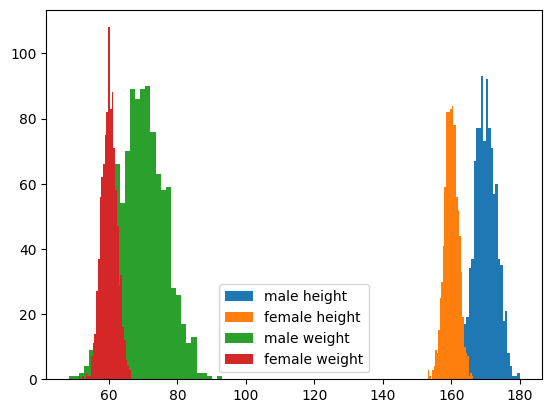

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples)   # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.legend(['male height','female height','male weight','female weight'])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.99406039]
0.8605563225284785


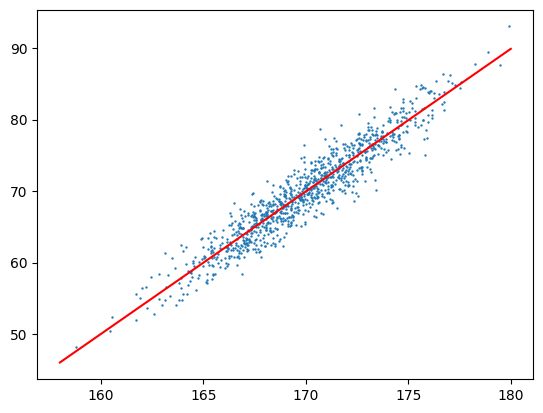

In [ ]:
xs = np.linspace(158, 180, 100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[0.97950021] -96.73506774946834
0.8226885744890965


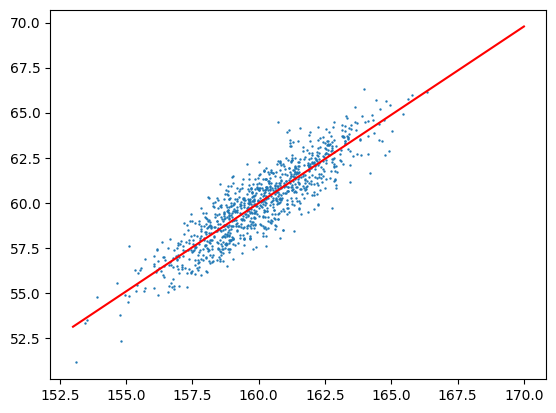

In [ ]:
xs = np.linspace(153,170,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

In [ ]:
# put together
x = np.concatenate((x1, x2))   # height
y = np.concatenate((y1, y2))   # weight

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.14558248] -124.0878598803403
0.8647530114750104


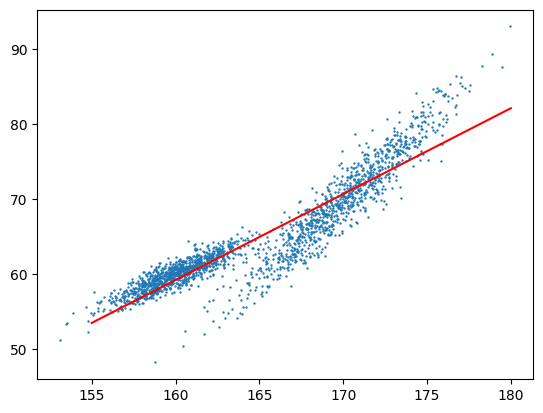

In [ ]:
xs = np.linspace(155,180,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x, y, s=0.5)
plt.plot(xs, ys, c='r')

- Now, we will add another feature (sex)

In [ ]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)  # 기존 인덱스 무시

In [ ]:
X.sample(5)

,height,sex
1991,158.059849,1
1634,160.986005,1
426,171.437944,0
1072,158.948824,1
60,171.253901,0


In [ ]:
y[-5:]

array([66.00219607, 60.651153  , 58.75589429, 60.2042639 , 59.27590489])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_, leg.intercept_)
print(leg.score(X_test, y_test))

[1.7002343  7.03185202] -219.11107242013213
0.910669863393382


In [ ]:
## 위의 결과는 1.67*zl + 6.8*성별 - 215.43 의 선형 모델 구성
## score 는 92 % 로 향상
## 성별은 0(남성), 1(여성)

In [ ]:
X_train[:5]

,height,sex
223,171.507657,0
688,175.471013,0
407,170.312563,0
819,166.954199,0
380,166.769752,0


In [ ]:
# K-Fold Cross validation (교차겸증)
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
X.shape

(2000, 2)

In [ ]:
cv = KFold(n_splits=5, shuffle=True) # Whether to shuffle the data before
                                     # splitting into batches.
score = cross_val_score(leg, X, y, cv=cv)
score, score.mean()

(array([0.92261311, 0.91408578, 0.91652985, 0.90867551, 0.91043995]),
 0.9144688390676873)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
print("Train score: {}".format(dec_reg.score(X_train, y_train)))
print("Test score: {}".format(dec_reg.score(X_test, y_test)))

Train score: 1.0
Test score: 0.8917011357354974


# Additional for Linear Regression
- adjusted R-squared

In [ ]:
n_samples = 100
x1 = 3*np.random.randn(n_samples) + 170
y1 = 2*x1 - 270 + 2*np.random.randn(n_samples)

In [ ]:
model1 = LinearRegression()
model1.fit(x1.reshape(-1,1), y1)
print(model1.score(x1.reshape(-1,1), y1))
print(model1.coef_, model1.intercept_)

0.9288566422728697
[2.00347418] -270.5747037757187


In [ ]:
x2 = np.random.randn(n_samples)
model2 = LinearRegression()
model2.fit(np.c_[x1, x2], y1)
print(model2.score(np.c_[x1, x2], y1))
print(model2.coef_, model2.intercept_)

0.9288706423566878
[ 2.00502736 -0.02405026] -270.84018541933466


In [ ]:
x3 = np.random.randn(n_samples) * 100
model3 = LinearRegression()
model3.fit(np.c_[x1, x2, x3], y1)
print(model3.score(np.c_[x1, x2, x3], y1))
print(model3.coef_, model3.intercept_)

0.9316941195414454
[ 2.0105181  -0.08224618  0.00418224] -271.80910137969704


In [ ]:
x4 = np.random.randn(n_samples, 20)   # 100x20
x_all = np.concatenate((np.c_[x1, x2, x3], x4), axis=1)   # 100x23

model4 = LinearRegression()
model4.fit(x_all, y1)
print(model4.score(x_all, y1))
print(model4.coef_, model4.intercept_)

0.9455439891497741
[ 2.01421902 -0.16486983  0.00302915 -0.08769963  0.04138513 -0.1668245
  0.38828629  0.11416401  0.1508343  -0.02576499 -0.12240548  0.06793136
 -0.10017531 -0.03357393  0.1406257  -0.02484357  0.0954421   0.65748068
  0.05104421  0.07865961 -0.04867533  0.09690264 -0.46840568] -272.3567020170028


- R-square is deceptive. R-squared **never decreases** when a new X variable is added to the model.

- Adjustred R-squared:
  - It identifies the percentage of variance in the target field that is explained by the input or inputs.
  - it is always less than R-squared.
  - A value of 1 indicates a model that perfectly predicts values in the target field.
  - A value that is less than or equal to 0 indicates a model that has no predictive value. In the real world, adjusted R2 lies between these values.
  - The definition is shown in the following example.
- The adjusted R2 tells you the percentage of variation explained by only the feature variables that actually affect the target variable.
- If n is large, not that big difference. But, when n is small, it can give significant difference.

In [ ]:
def adj_R2 (X, y, R2):
    n = len(y)      # no of samples
    p = X.shape[1]  # no of features
    return (1 - (1-R2)*(n-1)/(n-p-1))

In [ ]:
model1 = LinearRegression()
model1.fit(x1.reshape(-1,1), y1)
R2 = model1.score(x1.reshape(-1,1), y1)
print(R2, adj_R2(x1.reshape(-1,1), y1, R2))

0.9288566422728697 0.928130689643001


In [ ]:
x2 = np.random.randn(n_samples)
model2 = LinearRegression()
model2.fit(np.c_[x1, x2], y1)

R2 = model2.score(np.c_[x1, x2], y1)
print(R2, adj_R2(np.c_[x1, x2], y1, R2))

0.9288628442048092 0.927396098724496


In [ ]:
x4 = np.random.randn(n_samples,20)   # 1000x20
x_all = np.concatenate((np.c_[x1, x2, x3], x4), axis=1)   # 1000x23

model4 = LinearRegression()
model4.fit(x_all, y1)
R2 = model4.score(x_all, y1)
print(R2, adj_R2(x_all, y1, R2))

0.9417020834073437 0.9240592928595662


- another way (use statsmodels.api)

In [ ]:
# another way
import statsmodels.api as sm

X1 = sm.add_constant(x1.reshape(-1,1))
result = sm.OLS(y1, X1).fit()  # OLS(ordinary least square) - linear
print (result.rsquared, result.rsquared_adj)

0.9288566422728697 0.928130689643001


In [ ]:
X1 = sm.add_constant(np.c_[x1, x2])
result = sm.OLS(y1, X1).fit()  # OLS(ordinary least square) - linear
print (result.rsquared, result.rsquared_adj)

0.9288628442048097 0.9273960987244965


In [ ]:
X1 = sm.add_constant(x_all)
result = sm.OLS(y1, X1).fit()
print (result.rsquared, result.rsquared_adj)

0.9417020834073434 0.9240592928595658


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     53.38
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           9.38e-38
Time:                        05:59:21   Log-Likelihood:                -187.49
No. Observations:                 100   AIC:                             423.0
Df Residuals:                      76   BIC:                             485.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -267.3119     11.448    -23.350      0.000    -290.113    -244.511
x1             1.9840      0.067     29.451      0.000       1.850       2.118
x2            -0.1140      0.199     -0.574      0.568      -0.510       0.282
x3             0.0037      0.003      1.479      0.143      -0.001       0.009
x4             0.2893      0.214      1.353      0.180      -0.136       0.715
x5            -0.3562      0.216     -1.653      0.103      -0.785       0.073
x6            -0.0075      0.188     -0.040      0.968      -0.383       0.368
x7             0.2566      0.207      1.238      0.219      -0.156       0.669
x8            -0.2434      0.231     -1.056      0.294      -0.703       0.216
x9             0.2344      0.199      1.178      0.242      -0.162       0.631
x10           -0.1943      0.185     -1.053      0.296      -0.562       0.173
x11           -0.1649      0.200     -0.824      0.412      -0.563       0.234
x12            0.3046      0.204      1.490      0.140      -0.102       0.712
x13           -0.0443      0.214     -0.208      0.836      -0.470       0.381
x14           -0.2176      0.218     -1.000      0.320      -0.651       0.216
x15            0.0066      0.195      0.034      0.973      -0.382       0.395
x16           -0.2434      0.227     -1.074      0.286      -0.695       0.208
x17           -0.1415      0.198     -0.716      0.476      -0.535       0.252
x18            0.2003      0.210      0.952      0.344      -0.219       0.620
x19           -0.0683      0.223     -0.307      0.760      -0.512       0.376
x20            0.1759      0.200      0.880      0.382      -0.222       0.574
x21           -0.1534      0.248     -0.619      0.538      -0.647       0.340
x22            0.0186      0.197      0.094      0.925      -0.374       0.411
x23            0.1582      0.187      0.848      0.399      -0.213       0.530
==============================================================================
Omnibus:                        1.568   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.026
Skew:                           0.130   Prob(JB):                        0.599
Kurtosis:                       3.422   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression Performance Analysis
- Both R-squared and p-values play important roles in evaluating the **model’s performance** and the **significance of its predictors**.
- **Model Evaluation**: R-squared gives an overall indication of the goodness-of-fit of the model. It tells you how well your model captures the variability in the response variable.
- **Predictor Significance**: P-values for individual predictors tell you which specific predictors are statistically significant. This is crucial for model interpretation and for understanding the contributions of each predictor.



## Significance of the model
- t-values and corresponding p-values:
  - the significance of individual coefficients in the regression model
  - t-value: Measures the number of standard deviations the coefficient is away from zero. Higher absolute t-values indicate that the null hypothesis (that the coefficient is zero) is less likely to be true.
  - p-value: Indicates the probability of observing a t-value as extreme as, or more extreme than, the observed value under the null hypothesis.
  - Lower p-values (typically ≤ 0.05) indicate strong evidence against the null hypothesis, suggesting that the predictor variable is significant.
- F-value and its corresponding p-value:
  - used to determine the overall significance of the regression model
  - F-value (F-statistic): Compares the model with no predictors (intercept-only model) to the specified model to see if the added predictors improve the model significantly. (H0: all regression coefficients are equal to zero)
  - High F-value: Indicates that your model is better than the intercept-only model and at least one predictor is significantly related to the dependent variable.
  - Low p-value: indicates that the observed F-value is unlikely to have occurred under the null hypothesis, thus suggesting **that the overall model is significant.**
- for classification and nonlinear models,use different evaluation metrics:
  - Classification Metrics: Accuracy, precision, recall, F1 score, ROC-AUC.
  - Logistic Regression: Coefficients, p-values, likelihood-ratio test.
  - Nonlinear Regression: R-squared, adjusted R-squared, AIC/BIC, cross-validation scores.

# Exercise

In [ ]:
df = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key2': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})

In [ ]:
df.head()

,key1,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4


In [ ]:
other.head()

,key2,B
0,K0,B0
1,K1,B1
2,K2,B2


In [ ]:
df.join(other)   # by index

,key1,A,key2,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN
